<h3 style='color: blue; text-align: center'> Import Libraries</h3>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4 style='color: red; text-align: center'>Import DataSet</h4>

In [3]:
df=pd.read_csv('D:\Veri_Madenciliği_Ödev\VM_Odev_ID3_Algorithm\diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<h2 style='color: blue; text-align: center'>Data cleaning</h2>

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [7]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [10]:
df['age'].value_counts().sort_index()

age
0.08       36
0.16       59
0.24       87
0.32       89
0.40       66
         ... 
76.00     733
77.00     730
78.00     682
79.00     621
80.00    5621
Name: count, Length: 102, dtype: int64

<h4 style='color: red; text-align: center'>Function to display ages with decimal values</h4>

In [11]:
def display_decimal_age(df):
    
    # Identify rows containing decimal numbers // Ondalık sayılar içeren satırları belirleyin
    decimal_age_rows = df[df['age'].notnull() & df['age'] % 1 != 0]
    
    # Display only the "age" column of these rows  // Yalnızca bu satırların "age" sütununu gösterin
    decimal_age = decimal_age_rows['age']
    
    return decimal_age


decimal_age = display_decimal_age(df)
print(decimal_age)

155      0.08
218      0.56
241      0.88
268      0.16
396      0.16
         ... 
99536    0.40
99629    0.64
99778    0.32
99911    0.32
99916    1.48
Name: age, Length: 2018, dtype: float64


In [12]:
decimal_age.value_counts().sort_index()

age
0.08     36
0.16     59
0.24     87
0.32     89
0.40     66
0.48     83
0.56     96
0.64     99
0.72    104
0.80    102
0.88     90
1.08     95
1.16     89
1.24     90
1.32    103
1.40    101
1.48    107
1.56    113
1.64    118
1.72     97
1.80    108
1.88     86
Name: count, dtype: int64

In [13]:
len(decimal_age)

2018

<h4 style='color: red; text-align: center'>Convert the values of decimal ages to integers</h4>

In [14]:
df.age.loc[2049]

0.08

In [15]:
df.age.value_counts().sort_index()

age
0.08       36
0.16       59
0.24       87
0.32       89
0.40       66
         ... 
76.00     733
77.00     730
78.00     682
79.00     621
80.00    5621
Name: count, Length: 102, dtype: int64

In [16]:
df.shape

(100000, 9)

In [17]:
df_copy=df.copy()

In [18]:
df_copy.shape

(100000, 9)

<h4 style='color: red; text-align: center'>Remove the value Other from the gender column</h4>

In [19]:
df=df[df['gender']!='Other']
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
df.shape

(99982, 9)

<h4 style='color: red; text-align: center'>Remove the value No Info from the smoking_history column</h4>

In [21]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


<h4 style='color: red; text-align: center'>Some graphs for Data visualization</h4>

Text(0.5, 1.0, 'Gender')

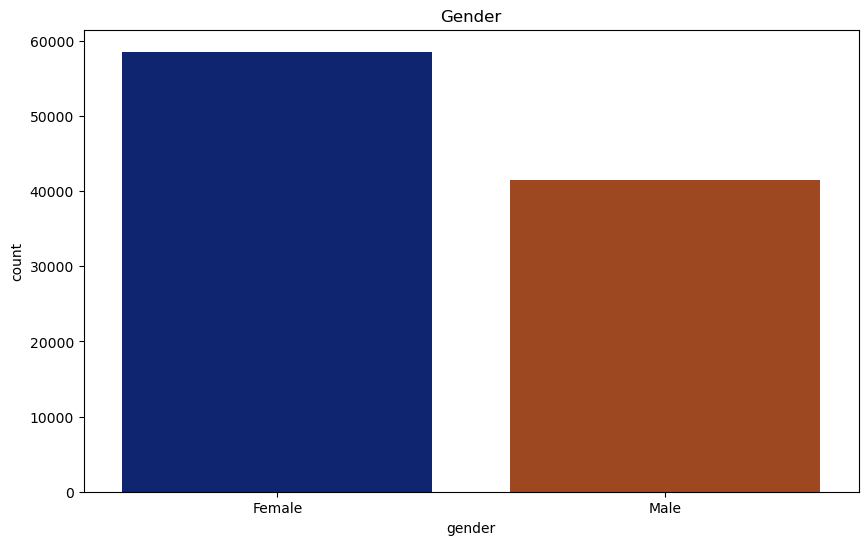

In [22]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='gender', data=df, palette="dark")
plt.title("Gender")

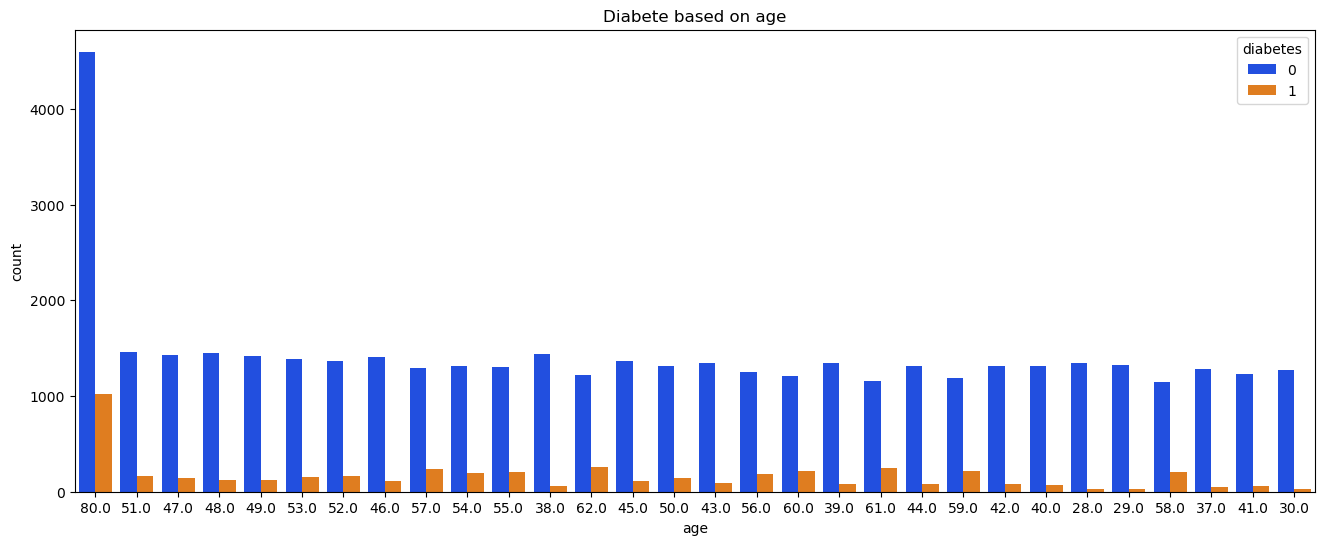

In [23]:
plt.figure(figsize=(16,6))
ax=sns.countplot(x='age', hue='diabetes', data=df, palette='bright', order=df['age'].value_counts().index[0:30])
plt.title("Diabete based on age")
plt.show()

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

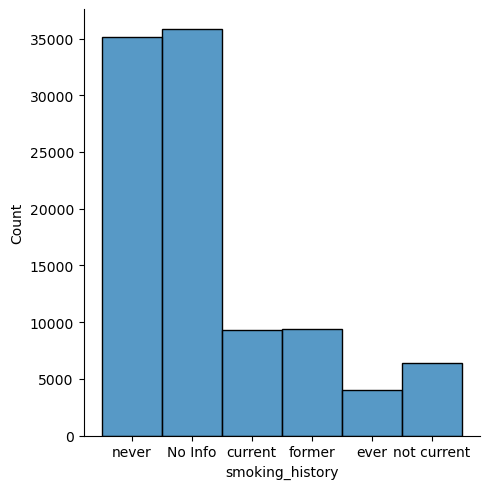

In [24]:
plt.figure(figsize=(10,5))
sns.displot(df['smoking_history'])

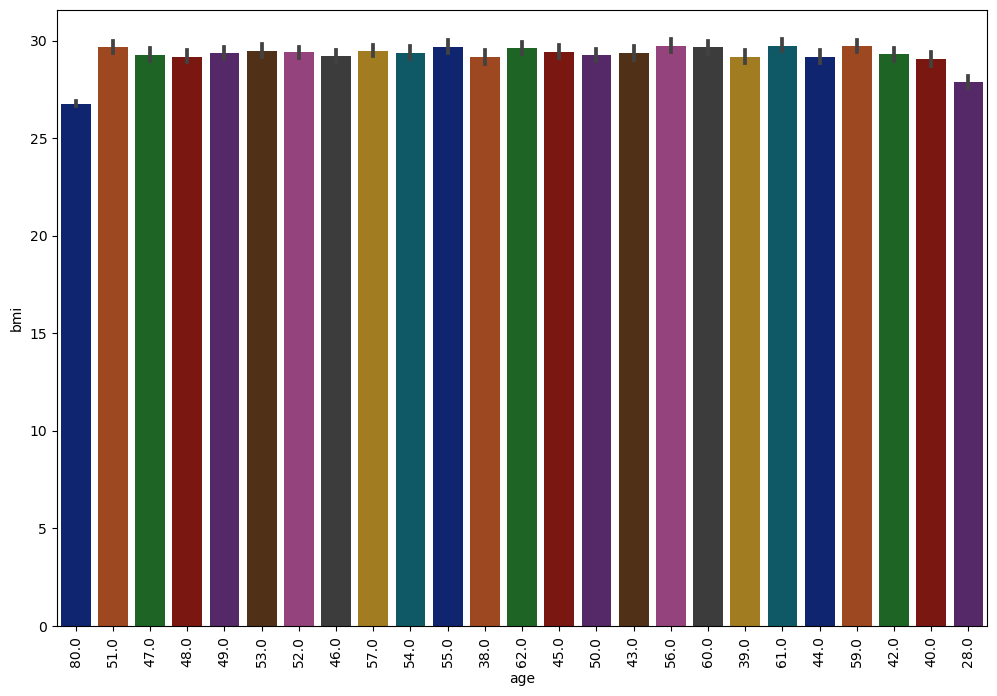

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['age'], y=df['bmi'], order=df['age'].value_counts().index[0:25], palette='dark')
plt.xticks(rotation='vertical')
plt.show()

<h2 style='color: blue; text-align: center'>Preprocessing of data(Veri Önişleme)</h2>

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<h4 style='color: red; text-align: center'> Encoding the categorical data labels into numerical values for the "age" and "smoking_history" columns("age" ve "smoking_history" sütunlarındaki kategorik veri etiketlerini sayısal değerlere dönüştürme).</h4>